<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P6E4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

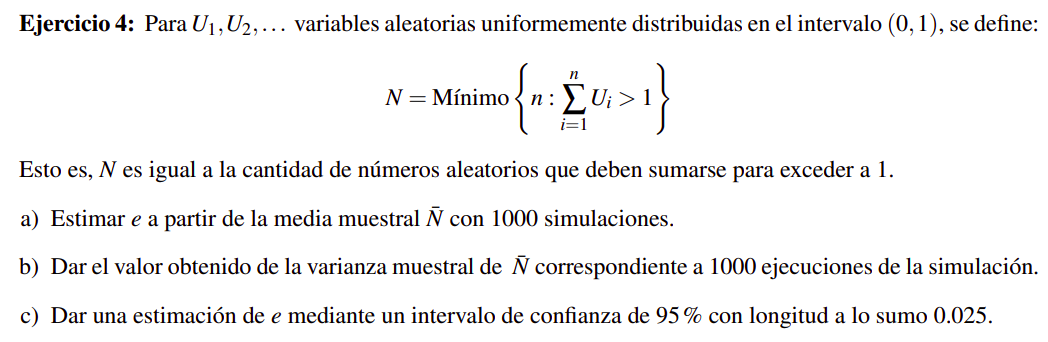

In [102]:
# a)
from random import random, seed
from scipy import stats
import numpy as np

def experimento():
  n = 0
  contador = 0
  while n <= 1:
    n += random()
    contador += 1
  return contador

def estimar_media_muestral_conn(n):
  muestras = [experimento() for _ in range(n)]
  media = sum(muestras) / n
  varianza = sum([(x - media) ** 2 for x in muestras]) / n
  return media, varianza

seed(1)
media, varianza = estimar_media_muestral_conn(1000)

print("media estimada: ", media)
print("e: ",np.e)

# b
print("varianza: ", varianza)

media estimada:  2.725
e:  2.718281828459045
varianza:  0.7933749999999912


In [103]:
CONFIANZA = 0.95
ALPHA = 1 - CONFIANZA
Z_ALPHA_2 = abs(stats.norm.ppf(ALPHA / 2))
LONGITUD_IC = 0.025  # según consigna
VALOR_ESPERADO = np.e

def estimar_media_muestral_conIC():
    """
    Estima la media muestral con IC del 95% y longitud máxima especificada.
    """
    error_estandar_max = LONGITUD_IC / (2 * Z_ALPHA_2)
    n = 1
    x = experimento()
    media = x
    Scuad = 0

    while n <= 100 or np.sqrt(Scuad / n) > error_estandar_max:
        n += 1
        x = experimento()
        media_anterior = media
        media += (x - media) / n
        Scuad = Scuad * (1 - 1/(n-1)) + n*(media - media_anterior)**2

    S = np.sqrt(Scuad)
    intervalo = (
        media - Z_ALPHA_2 * S / np.sqrt(n),
        media + Z_ALPHA_2 * S / np.sqrt(n)
    )

    return n, media, Scuad, intervalo

seed(1)
n, media, Scuad, intervalo = estimar_media_muestral_conIC()
print(f"n:        {n}")
print(f"media:    {media:.6f}")
print(f"Scuad:    {Scuad:.6f}")
print(f"IC:       ({intervalo[0]:.6f}, {intervalo[1]:.6f})")
print(f"Long. IC: {intervalo[1] - intervalo[0]:.6f}")

if not (intervalo[0] <= VALOR_ESPERADO <= intervalo[1]):
    print("⚠️ El valor esperado no está dentro del intervalo de confianza.")

n:        19072
media:    2.717020
Scuad:    0.775720
IC:       (2.704520, 2.729519)
Long. IC: 0.025000
